In [51]:
# Import all necessary packages.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Import and display the raw housing prices data.
# Raw data source: https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features

house_data = pd.read_csv('California_Houses.csv')
house_data

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


__Key:__

 - Median house value: Median house value for households within a block
 - Median income: Median income for households within a block of houses (in tens of thousands of US dollars)
 - Median age: Median age of a house within a block; a lower number is a newer building
 - Total rooms: Total number of rooms within a block
 - Total bedrooms: Total number of bedrooms within a block
 - Population: Total number of people residing within a block
 - Households: Total number of households, a group of people residing within a home unit, for a block
 - Latitude: A measure of how far north a house is; a higher value is farther north
 - Longitude: A measure of how far west a house is; a higher value is farther west
 - Distance to coast: Distance to the nearest coast point (in meters)
 - Distance to Los Angeles: Distance to the centre of Los Angeles (in meters)
 - Distance to San Diego: Distance to the centre of San Diego (in meters)
 - Distance to San Jose: Distance to the centre of San Jose (in meters)
 - Distance to San Francisco: Distance to the centre of San Francisco (in meters)

In [53]:
# Display summary data of the raw data.

house_data.shape

(20640, 14)

In [54]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [55]:
house_data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


In [56]:
# Confirm that there are no missing values.

missing = pd.concat([house_data.isnull().sum(), 100 * house_data.isnull().sum() / len(house_data)], axis = 1)
missing.columns = ['Missing count', 'Missing %']
missing

,Missing count,Missing %
Median_House_Value,0,0.0
Median_Income,0,0.0
Median_Age,0,0.0
Tot_Rooms,0,0.0
Tot_Bedrooms,0,0.0
Population,0,0.0
Households,0,0.0
Latitude,0,0.0
Longitude,0,0.0
Distance_to_coast,0,0.0


In [57]:
# Check for duplicates based on latitude, longitude, median house value, and median income.
# A degree of latitude is ~69 miles and a degree of longitude is ~54.6 miles, so some blocks can certainly have the same latitude and longitude.

duplicates = house_data[house_data.duplicated(subset = ['Latitude', 'Longitude', 'Median_House_Value', 'Median_Income'], keep = False)]
duplicates

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
4605,500001.0,15.0001,52,2248,255,813,265,34.07,-118.33,17257.043241,8193.083014,185611.836109,485048.179536,553063.888966
4606,500001.0,15.0001,52,1482,171,531,161,34.07,-118.33,17257.043241,8193.083014,185611.836109,485048.179536,553063.888966
5291,500001.0,15.0001,46,1399,148,410,152,34.08,-118.42,10562.184468,16531.914660,191492.369005,478847.650945,546841.630689
8852,500001.0,15.0001,48,2413,261,770,248,34.08,-118.42,10562.184468,16531.914660,191492.369005,478847.650945,546841.630689
8853,500001.0,15.0001,52,3562,394,1163,361,34.07,-118.41,10620.894804,15447.674619,190049.133203,480291.496360,548285.430234
8854,500001.0,15.0001,52,1202,142,408,138,34.07,-118.41,10620.894804,15447.674619,190049.133203,480291.496360,548285.430234


__Takeaways of the data, pt. 1:__

 - All columns contain only non-categorical numerical data.
 - There are no missing values, nor are there zeroes being used to represent missing values.
 - There are three pairs of duplicates based on latitude, longitude, median house value, and median income. It is strange that all six duplicates have the exact same median house value and median income of $500001 and $150001, respectively, which are also the maximum values of each field. At a glance, there are also a surprising number of blocks with a median age equal to the maximum of 52. These may be placeholders for values that are actually missing.
 - Means, medians, maximums, and percentiles all seem reasonable. The minimum values for median house value, median income, total rooms/bedrooms, population, and households may warrant some additional research, although the minimum households value of 1, if true, would be consistent with most of the other minimum values.
 - The medium income is in tens of thousands of USD, and the distances are all in meters. Consider changing these to single USD and miles for easier reading.

__Checking this takeaway:__ There are three pairs of duplicates based on latitude, longitude, median house value, and median income. It is strange that all six duplicates have the exact same median house value and median income of $500001 and $150001, respectively, which are also the maximum values of each field. At a glance, there are also a surprising number of blocks with a median age equal to the maximum of 52. These may be placeholders for values that are actually missing.

In [58]:
# Pull blocks with a median house value of $500001.

house_data[house_data['Median_House_Value'] == 500001]

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
89,500001.0,1.2434,52,249,78,396,85,37.80,-122.27,2524.614616,552234.051520,731023.574910,61415.352107,14466.705382
459,500001.0,1.1696,52,609,236,1349,250,37.87,-122.25,7897.024567,556856.927951,735788.372333,67242.518282,19172.818850
493,500001.0,7.8521,52,1668,225,517,214,37.86,-122.24,9154.528309,555442.508624,734372.602301,65849.139433,19335.741176
494,500001.0,9.3959,52,3726,474,1366,496,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
509,500001.0,7.8772,52,2990,379,947,361,37.83,-122.23,7284.913015,552365.471150,731263.568173,62493.112522,18750.946278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20422,500001.0,5.1457,35,1503,263,576,216,34.14,-118.90,14291.579333,61216.656474,226094.866626,446290.715147,514009.977382
20426,500001.0,10.0472,11,1177,138,415,119,34.18,-118.69,18176.185168,43474.083341,215937.609697,454515.893658,522432.194774
20427,500001.0,8.6499,4,15572,2222,5495,2152,34.19,-118.80,18641.855451,53452.716325,223581.653218,447394.402471,515242.869506
20436,500001.0,12.5420,10,3663,409,1179,371,34.21,-118.69,21190.509577,44668.866342,218447.682475,451911.949029,519844.963178


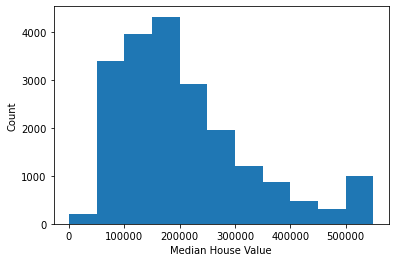

In [59]:
mhv_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000]
plt.hist(house_data['Median_House_Value'], bins = mhv_bins)
plt.xlabel('Median House Value')
plt.ylabel('Count')
plt.show()

In [60]:
# Pull blocks with a median income of $150001.

house_data[house_data['Median_Income'] == 15.0001]

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
1566,350000.0,15.0001,2,200,20,25,9,37.74,-121.96,21520.971317,529242.245522,708360.814038,45366.521933,41604.635430
4352,500001.0,15.0001,37,407,67,100,47,34.10,-118.37,15550.901428,12789.073999,190480.488778,480119.334341,548133.012619
4604,500001.0,15.0001,52,1841,240,693,218,34.06,-118.33,16913.332179,7998.591213,184714.571409,485894.056104,553907.429973
4605,500001.0,15.0001,52,2248,255,813,265,34.07,-118.33,17257.043241,8193.083014,185611.836109,485048.179536,553063.888966
4606,500001.0,15.0001,52,1482,171,531,161,34.07,-118.33,17257.043241,8193.083014,185611.836109,485048.179536,553063.888966
4626,500001.0,15.0001,52,955,100,457,120,34.06,-118.32,17799.720527,7083.434291,184170.682560,486491.941831,554507.575103
4678,500001.0,15.0001,52,1721,195,688,196,34.08,-118.34,16821.379342,9393.867124,187052.977003,483604.491044,551620.277609
5242,500001.0,15.0001,32,5578,753,1567,697,34.11,-118.40,14204.679395,15764.191523,193021.882853,477482.640866,545491.465196
5247,500001.0,15.0001,36,3129,392,862,334,34.09,-118.44,10119.471265,18563.468634,193503.600292,476813.596959,544804.284985
5248,500001.0,15.0001,46,778,90,238,93,34.08,-118.43,9888.089286,17437.687445,192060.266802,478257.379914,546248.027806


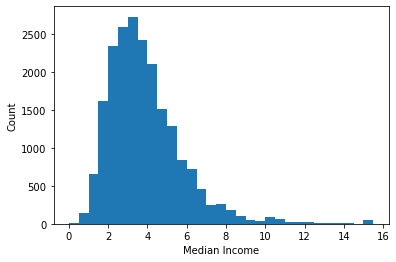

In [61]:
mi_bins = [0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5]
plt.hist(house_data['Median_Income'], bins = mi_bins)
plt.xlabel('Median Income')
plt.ylabel('Count')
plt.show()

In [62]:
# Pull blocks with a median age of 52. Also pull count of blocks with a median age of 51 for comparison.

house_data[house_data['Median_Age'] == 52]

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
5,269700.0,4.0368,52,919,213,413,193,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
6,299200.0,3.6591,52,2535,489,1094,514,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20142,183300.0,1.8618,52,1239,320,934,298,34.36,-119.06,22224.285073,82501.017447,253766.687803,417883.711059,485643.570190
20220,349000.0,4.1250,52,2239,420,941,397,34.28,-119.27,2519.519767,97762.320976,261702.199798,413939.036245,481341.432838
20236,198400.0,2.3750,52,459,112,276,107,34.27,-119.27,1414.755917,97485.605527,260973.072725,414860.417424,482249.641276
20237,206600.0,3.5893,52,1577,343,836,335,34.27,-119.27,1414.755917,97485.605527,260973.072725,414860.417424,482249.641276


In [63]:
len(house_data[house_data['Median_Age'] == 51])

48

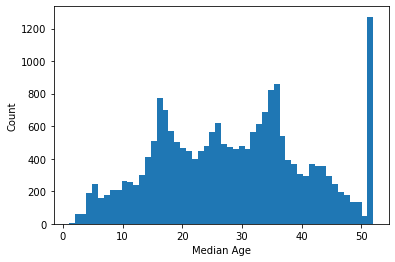

In [64]:
ma_bins = 52
plt.hist(house_data['Median_Age'], bins = ma_bins)
plt.xlabel('Median Age')
plt.ylabel('Count')
plt.show()

In [65]:
# Since median house value is the dependent variable, the records missing a value for this field are useless, so they will be removed from the dataset.

house_data = house_data[house_data['Median_House_Value'] != 500001]
house_data

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [66]:
# The median incomes of $150001 and median ages of 52 will impute the means of their respective fields.
# This may heavily skew median age toward its mean because there are so many values that need imputation. CONFIRM WITH REVIEWERS THAT THIS IS OK.

median_income_impmean = np.mean(house_data['Median_Income'][house_data['Median_Income'] != 15.0001])
median_age_impmean = np.mean(house_data['Median_Age'][house_data['Median_Age'] != 52])

house_data = house_data.replace({'Median_Income': 15.0001}, median_income_impmean)
house_data = house_data.replace({'Median_Age': 52}, median_age_impmean)
house_data

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41.000000,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21.000000,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,26.983847,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,26.983847,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,26.983847,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25.000000,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18.000000,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17.000000,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18.000000,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [73]:
house_data.describe()

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
count,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.00000
mean,192477.921017,36749.901027,26.983847,2619.763659,539.653113,1440.812198,501.186023,35.651780,-119.563192,26.048491,168.915463,248.443383,217.319406,240.55352
std,97711.509613,15640.327384,11.106738,2181.348207,422.294861,1143.648725,383.264636,2.149802,2.006108,30.964588,154.107660,180.514495,134.703038,155.06982
min,14999.000000,4999.000000,1.000000,2.000000,2.000000,3.000000,2.000000,32.540000,-124.350000,0.070000,0.260000,0.300000,0.350000,0.28000
25%,116600.000000,25268.000000,18.000000,1438.000000,297.000000,796.000000,282.000000,33.930000,-121.760000,6.090000,20.535000,98.730000,73.115000,74.73500
50%,173800.000000,34500.000000,26.983847,2111.000000,436.000000,1179.000000,411.000000,34.270000,-118.500000,13.240000,110.110000,138.700000,284.590000,325.95000
75%,248200.000000,45813.000000,35.000000,3120.000000,648.000000,1746.000000,606.000000,37.730000,-117.990000,33.055000,328.765000,439.795000,321.805000,363.91500
max,500000.000000,131477.000000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,207.420000,632.720000,743.730000,519.940000,561.49000


(array([1.802e+04, 1.389e+03, 1.740e+02, 5.900e+01, 1.900e+01, 7.000e+00,
        5.000e+00, 2.000e+00]),
 array([    0,  5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]),
 <BarContainer object of 8 artists>)

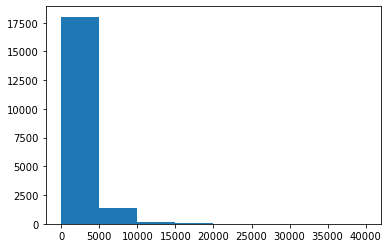

In [88]:
# Check for other outliers or other indicators of missing values.

tr_binwidth = 5000
plt.hist(house_data['Tot_Rooms'], bins = range(0, 40000 + tr_binwidth, tr_binwidth))

(array([1.1652e+04, 6.2020e+03, 1.1880e+03, 3.6700e+02, 1.2600e+02,
        7.3000e+01, 2.7000e+01, 1.5000e+01, 1.3000e+01, 6.0000e+00,
        4.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,
        5500, 6000, 6500]),
 <BarContainer object of 13 artists>)

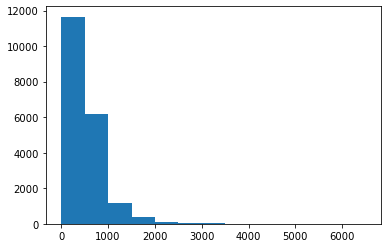

In [92]:
tb_binwidth = 500
plt.hist(house_data['Tot_Bedrooms'], bins = range(0, 6500 + tb_binwidth, tb_binwidth))

(array([1.835e+04, 1.135e+03, 1.530e+02, 2.600e+01, 5.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([    0,  3000,  6000,  9000, 12000, 15000, 18000, 21000, 24000,
        27000, 30000, 33000, 36000]),
 <BarContainer object of 12 artists>)

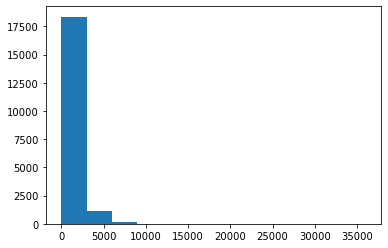

In [93]:
pop_binwidth = 3000
plt.hist(house_data['Population'], bins = range(0, 36000 + pop_binwidth, pop_binwidth))

(array([7.150e+02, 1.570e+03, 3.339e+03, 3.814e+03, 3.072e+03, 2.149e+03,
        1.470e+03, 1.007e+03, 6.110e+02, 4.440e+02, 3.360e+02, 2.380e+02,
        1.950e+02, 1.230e+02, 1.170e+02, 9.400e+01, 6.100e+01, 5.100e+01,
        4.100e+01, 3.200e+01, 2.200e+01, 2.200e+01, 1.800e+01, 2.100e+01,
        1.800e+01, 1.000e+01, 1.000e+01, 1.100e+01, 1.200e+01, 5.000e+00,
        5.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 4.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
        2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
        3300, 340

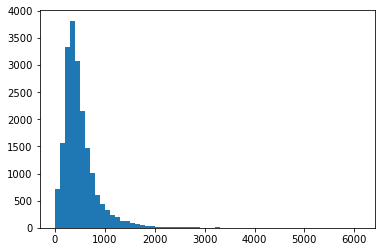

In [94]:
hh_binwidth = 100
plt.hist(house_data['Households'], bins = range(0, 6100 + hh_binwidth, hh_binwidth))

__Checking this takeaway:__ The medium income is in tens of thousands of USD, and the distances are all in meters. Consider changing these to single USD and miles for easier reading.

In [67]:
# Convert median income from tens of thousands of USD to single USD.

house_data['Median_Income_adj'] = round(house_data['Median_Income'] * 10000, 2)

# Convert distance fields from meters to miles.

house_data['Distance_to_coast_adj'] = round(house_data['Distance_to_coast'] / 1609.34, 2)
house_data['Distance_to_LA_adj'] = round(house_data['Distance_to_LA'] / 1609.34, 2)
house_data['Distance_to_SanDiego_adj'] = round(house_data['Distance_to_SanDiego'] / 1609.34, 2)
house_data['Distance_to_SanJose_adj'] = round(house_data['Distance_to_SanJose'] / 1609.34, 2)
house_data['Distance_to_SanFrancisco_adj'] = round(house_data['Distance_to_SanFrancisco'] / 1609.34, 2)

house_data_cols = ['Median_House_Value', 'Median_Income_adj', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude', 'Distance_to_coast_adj', 'Distance_to_LA_adj', 'Distance_to_SanDiego_adj', 'Distance_to_SanJose_adj', 'Distance_to_SanFrancisco_adj']
house_data = house_data[house_data_cols]
house_data

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
0,452600.0,83252.0,41.000000,880,129,322,126,37.88,-122.23,5.76,345.81,457.02,41.90,13.20
1,358500.0,83014.0,21.000000,7099,1106,2401,1138,37.86,-122.22,6.35,344.41,455.61,40.42,12.97
2,352100.0,72574.0,26.983847,1467,190,496,177,37.85,-122.24,5.13,344.62,455.79,40.31,11.69
3,341300.0,56431.0,26.983847,1274,235,558,219,37.85,-122.25,4.83,344.98,456.15,40.57,11.20
4,342200.0,38462.0,26.983847,1627,280,565,259,37.85,-122.25,4.83,344.98,456.15,40.57,11.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,15603.0,25.000000,1665,374,845,330,39.48,-121.09,100.68,406.71,516.13,154.42,138.33
20636,77100.0,25568.0,18.000000,697,150,356,114,39.49,-121.21,99.70,409.95,519.62,153.39,135.65
20637,92300.0,17000.0,17.000000,2254,485,1007,433,39.43,-121.22,95.54,406.40,516.17,149.24,131.79
20638,84700.0,18672.0,18.000000,1860,409,741,349,39.43,-121.32,94.45,408.68,518.64,148.01,129.20


__Checking this takeaway:__ Means, medians, maximums, and percentiles all seem reasonable. The minimum values for median house value, median income, total rooms/bedrooms, population, and households may warrant some additional research, although the minimum households value, if true, would be consistent with most of the other minimum values.

In [68]:
# Pull blocks with the least households.

house_data_tempsort = house_data.sort_values(by = ['Households'])
house_data_tempsort.head()

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
3126,137500.0,23750.0,4.000000,2,2,6,2,35.21,-117.79,91.92,84.05,176.06,271.63,312.74
12286,55000.0,16250.0,1.000000,6,2,8,2,33.86,-116.95,49.08,75.32,80.00,367.03,409.05
2511,162500.0,46250.0,36.000000,49,7,28,2,36.51,-119.54,106.77,184.88,294.97,141.93,181.61
14822,60000.0,11250.0,26.983847,16,4,8,3,32.66,-117.12,1.26,116.01,4.53,420.98,463.21
12458,275000.0,5360.0,26.000000,18,3,5,3,33.62,-114.62,62.80,210.09,159.69,482.85,523.61


In [69]:
# Pull blocks with the least people.

house_data_tempsort = house_data.sort_values(by = ['Population'])
house_data_tempsort.head()

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
5342,350000.0,5360.0,16.0,18,6,3,4,34.04,-118.44,4.10,11.27,117.54,298.94,341.18
12458,275000.0,5360.0,26.0,18,3,5,3,33.62,-114.62,62.80,210.09,159.69,482.85,523.61
3126,137500.0,23750.0,4.0,2,2,6,2,35.21,-117.79,91.92,84.05,176.06,271.63,312.74
18210,375000.0,37500.0,26.0,18,4,8,4,37.39,-122.06,6.13,314.60,425.40,9.91,33.42
12286,55000.0,16250.0,1.0,6,2,8,2,33.86,-116.95,49.08,75.32,80.00,367.03,409.05


In [70]:
# Pull blocks with the least bedrooms.

house_data_tempsort = house_data.sort_values(by = ['Tot_Bedrooms'])
house_data_tempsort.head()

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
3126,137500.0,23750.0,4.0,2,2,6,2,35.21,-117.79,91.92,84.05,176.06,271.63,312.74
12286,55000.0,16250.0,1.0,6,2,8,2,33.86,-116.95,49.08,75.32,80.00,367.03,409.05
12458,275000.0,5360.0,26.0,18,3,5,3,33.62,-114.62,62.80,210.09,159.69,482.85,523.61
3125,275000.0,16250.0,4.0,18,3,8,6,35.22,-117.76,93.30,85.24,176.40,272.65,313.71
13606,250000.0,46250.0,16.0,30,3,49,8,34.17,-117.27,52.81,56.29,100.68,339.08,381.07


In [71]:
# Pull blocks with the least rooms.

house_data_tempsort = house_data.sort_values(by = ['Tot_Rooms'])
house_data_tempsort.head()

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
3126,137500.0,23750.0,4.0,2,2,6,2,35.21,-117.79,91.92,84.05,176.06,271.63,312.74
12286,55000.0,16250.0,1.0,6,2,8,2,33.86,-116.95,49.08,75.32,80.00,367.03,409.05
5916,162500.0,28750.0,46.0,11,11,24,13,34.28,-118.44,18.54,19.33,130.81,286.32,328.59
73,67500.0,4999.0,46.0,12,4,18,7,37.81,-122.29,1.40,344.39,455.48,39.34,8.11
16888,350000.0,50480.0,26.0,15,3,11,3,37.60,-122.37,3.86,336.85,447.57,31.91,12.48


In [72]:
# Pull block(s) with the least median house values.

house_data_tempsort = house_data.sort_values(by = ['Median_House_Value'])
house_data_tempsort.head(10)

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
2521,14999.0,16607.0,16.000000,255,73,85,38,39.71,-122.74,55.86,463.05,574.39,170.33,134.80
2799,14999.0,21000.0,19.000000,619,239,490,164,36.40,-117.02,184.76,176.30,254.69,276.97,312.94
9188,14999.0,41932.0,26.983847,803,267,628,225,34.24,-117.86,37.94,25.49,112.76,311.13,353.32
19802,14999.0,5360.0,36.000000,98,28,18,8,40.31,-123.17,48.88,510.17,621.45,216.70,179.65
5887,17500.0,23667.0,39.000000,493,168,259,138,34.15,-118.33,13.62,8.37,119.84,297.22,339.49
1825,22500.0,26750.0,33.000000,296,73,216,63,37.93,-122.32,2.42,351.65,462.83,47.26,12.37
16186,22500.0,7917.0,26.983847,107,79,167,53,37.95,-121.29,14.76,318.58,429.95,53.77,63.43
14326,22500.0,10918.0,26.983847,845,451,1230,375,32.71,-117.16,2.06,111.85,0.40,416.83,459.06
13889,22500.0,27138.0,8.000000,9975,1743,6835,1439,35.43,-116.57,145.97,134.50,190.56,323.98,363.12
2779,25000.0,8571.0,21.000000,44,33,64,27,32.79,-114.65,6.74,224.83,146.00,515.89,557.49


In [81]:
house_data_tempsort[house_data_tempsort['Median_House_Value'] <= 25000]

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
2521,14999.0,16607.0,16.000000,255,73,85,38,39.71,-122.74,55.86,463.05,574.39,170.33,134.80
2799,14999.0,21000.0,19.000000,619,239,490,164,36.40,-117.02,184.76,176.30,254.69,276.97,312.94
9188,14999.0,41932.0,26.983847,803,267,628,225,34.24,-117.86,37.94,25.49,112.76,311.13,353.32
19802,14999.0,5360.0,36.000000,98,28,18,8,40.31,-123.17,48.88,510.17,621.45,216.70,179.65
5887,17500.0,23667.0,39.000000,493,168,259,138,34.15,-118.33,13.62,8.37,119.84,297.22,339.49
1825,22500.0,26750.0,33.000000,296,73,216,63,37.93,-122.32,2.42,351.65,462.83,47.26,12.37
16186,22500.0,7917.0,26.983847,107,79,167,53,37.95,-121.29,14.76,318.58,429.95,53.77,63.43
14326,22500.0,10918.0,26.983847,845,451,1230,375,32.71,-117.16,2.06,111.85,0.40,416.83,459.06
13889,22500.0,27138.0,8.000000,9975,1743,6835,1439,35.43,-116.57,145.97,134.50,190.56,323.98,363.12
2779,25000.0,8571.0,21.000000,44,33,64,27,32.79,-114.65,6.74,224.83,146.00,515.89,557.49


In [83]:
display(house_data_tempsort.loc[(house_data_tempsort['Median_House_Value'] > 25000) & (house_data_tempsort['Median_House_Value'] <= 50000)])

,Median_House_Value,Median_Income_adj,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast_adj,Distance_to_LA_adj,Distance_to_SanDiego_adj,Distance_to_SanJose_adj,Distance_to_SanFrancisco_adj
3027,26600.0,23013.0,34.0,1440,309,808,294,35.13,-119.45,49.98,101.26,212.23,204.33,246.60
3028,26900.0,21955.0,46.0,2745,543,1423,482,35.13,-119.46,49.89,101.64,212.58,203.96,246.22
12444,27500.0,12656.0,17.0,97,24,29,15,33.92,-114.67,83.29,204.93,166.15,469.09,509.48
17413,28300.0,27377.0,29.0,17738,3114,12427,2826,34.70,-120.59,2.99,141.08,240.05,196.11,235.87
3018,30000.0,26389.0,45.0,973,183,500,177,35.07,-119.45,45.91,98.27,209.01,207.48,249.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,50000.0,17727.0,19.0,749,238,476,169,33.36,-115.73,49.75,152.19,94.09,442.63,484.39
2877,50000.0,10648.0,39.0,1497,383,1182,355,35.38,-118.98,75.34,100.82,211.48,211.00,253.01
16217,50000.0,27656.0,5.0,123,21,50,20,37.96,-121.32,13.00,320.05,431.44,53.34,61.96
12409,50000.0,20250.0,33.0,278,91,375,81,33.75,-116.25,76.26,116.22,88.76,402.38,444.12


__Takeaways of the data, pt. 2:__

 - The pulling of the blocks with the least people showed that there is at least one block with fewer people than households. It's possible that these records include houses that are unoccupied, but we'll want to keep this in mind in case it matters.
 - The pulling of the blocks with the least median house value, as well as the blocks within specific low ranges of values, showed that there are 10 blocks with a median house value of $25000 or less. It seems suspicious that some of these values could be so low considering they are so close to the coast and major California cities, which historically have highly correlated to value, but this data is about 20 years old and there are any other number of factors that could result in the low value, so we won't question this for the time being.
 - There don't appear to be any further outliers or other indicators of missing values.
 - __The dataset should now be ready for exploratory analysis.__